In [11]:
from fastai import *
from fastai.vision import *
%matplotlib inline

#### Download the data

In [20]:
folder = 'Korean'
file = 'korean.csv'

In [13]:
folder = 'Japanese'
file = 'japanese.csv'

In [21]:
path = Path('data/girls')

In [22]:
dest = path/folder
dest.mkdir(parents = True, exist_ok =True)

In [23]:
path.ls()

[PosixPath('data/girls/Korean'),
 PosixPath('data/girls/Japanese'),
 PosixPath('data/girls/korean.csv'),
 PosixPath('data/girls/japanese.csv')]

In [25]:
classes = ['Japanese', 'Korean']

In [24]:
download_images(path/file, dest, max_pics=200)

In [26]:
### Checking all the valid files
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

#### View Data

In [28]:
np.random.seed(100)
data = ImageDataBunch.from_folder(path = path,train = ".", valid_pct = 0.2,
                                 ds_tfms=get_transforms(),
                                 size=224,num_workers=4)

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (222 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Korean,Korean,Korean,Korean,Korean
Path: data/girls;

Valid: LabelList (55 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Korean,Japanese,Japanese,Japanese,Japanese
Path: data/girls;

Test: None

In [29]:
print('The classes are: ', data.classes)

The classes are:  ['Japanese', 'Korean']


In [30]:
print('Number of classes: ', data.c)

Number of classes:  2


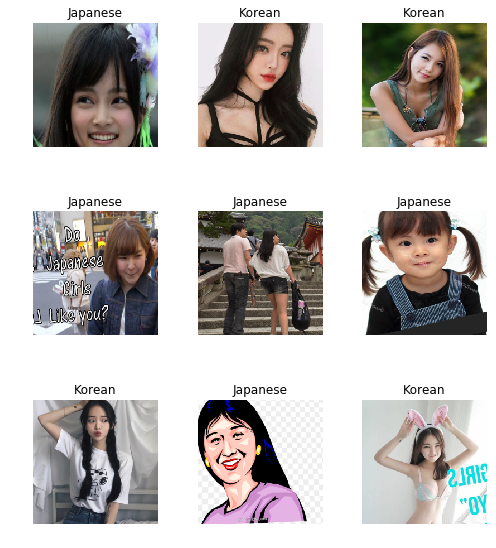

In [31]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
print('Number of samples in Training set: ',len(data.train_ds))

Number of samples in Training set:  222


In [33]:
print('Number of samples in Validation set: ',len(data.valid_ds))

Number of samples in Validation set:  55


#### Training a CNN model

In [37]:
model = cnn_learner(data, models.resnet50, metrics= error_rate)

In [38]:
model.fit_one_cycle(30)

In [39]:
model.save('girls')

In [41]:
interp = ClassificationInterpretation.from_learner(model)

50 misclassified samples over 55 samples in the validation set.


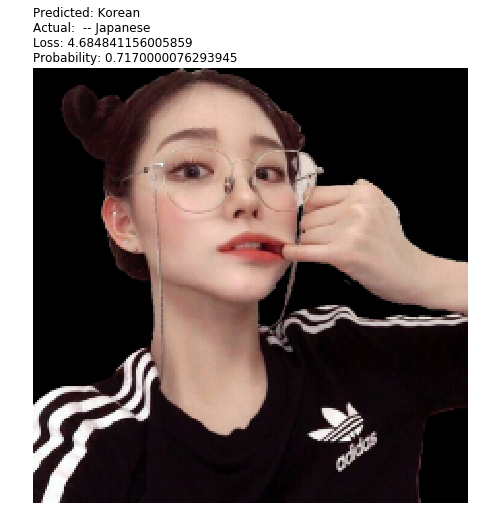

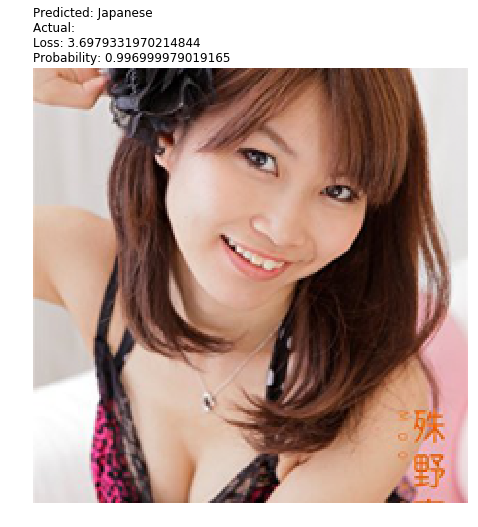

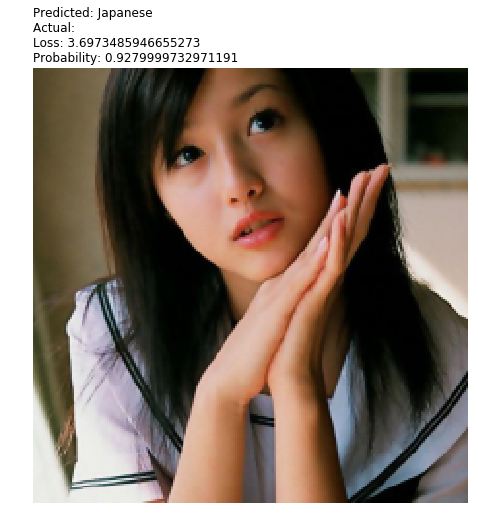

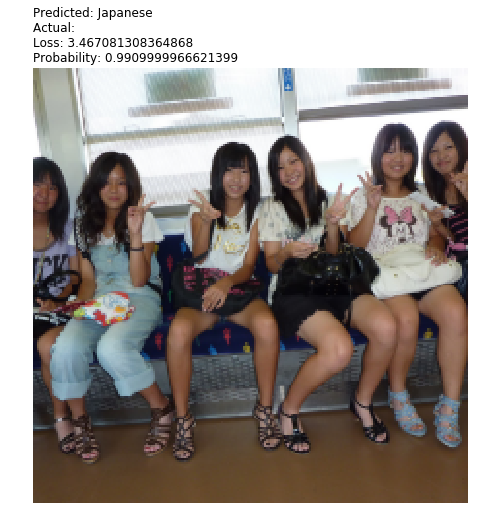

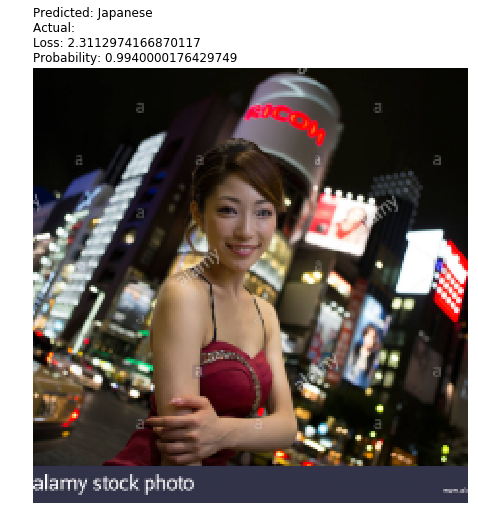

In [42]:
interp.plot_multi_top_losses(5, figsize=(8,8))

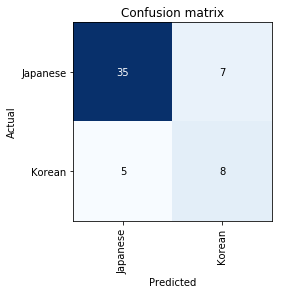

In [67]:
interp.plot_confusion_matrix()

In [68]:
interp.most_confused(min_val=5)

[('Japanese', 'Korean', 7), ('Korean', 'Japanese', 5)]

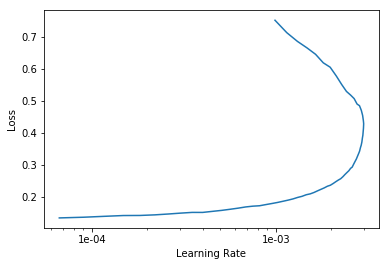

In [69]:
model.recorder.plot()

In [70]:
from fastai.widgets import *

In [47]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )


In [48]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('girls');

In [49]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [50]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [71]:
model.export()

In [72]:
learn = load_learner(path)

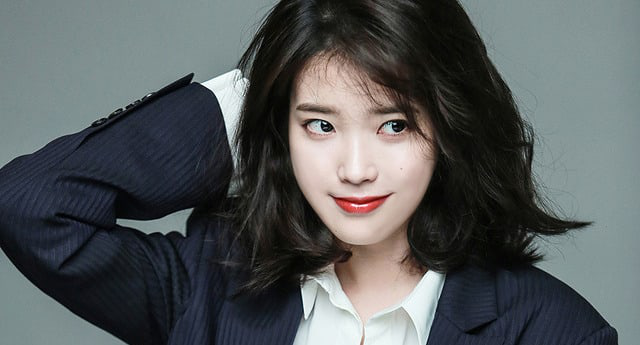

In [73]:
img = open_image(path/'Korean'/'00000023.jpg')
img

In [74]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category Korean

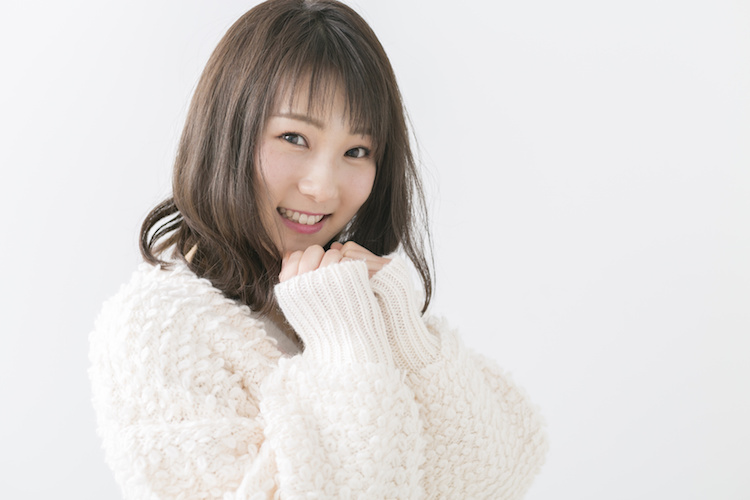

In [75]:
img = open_image(path/'Japanese'/'00000021.jpg')
img

In [76]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class



Category Japanese

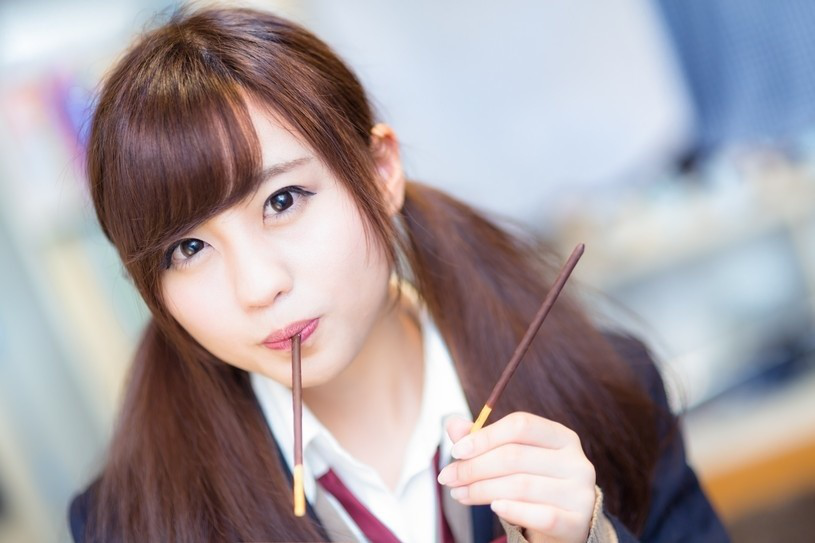

In [77]:
img = open_image(path/'Japanese'/'00000035.jpg')
img

In [78]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Japanese

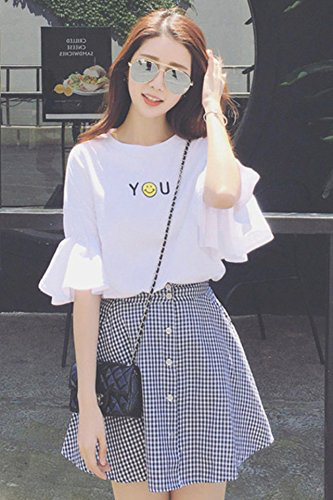

In [79]:
img = open_image(path/'Korean'/'00000027.jpg')
img

In [80]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Korean

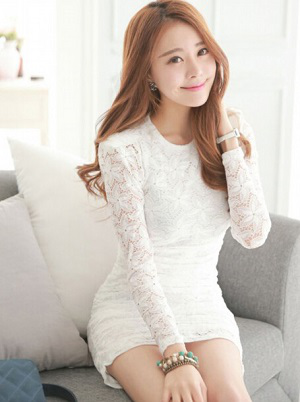

In [81]:
img = open_image(path/'Korean'/'00000045.jpg')
img

In [82]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Korean

In [83]:
#### Training with unfrozen model
model.unfreeze()

In [84]:
model.fit_one_cycle(50, max_lr=slice(3e-5,3e-4))

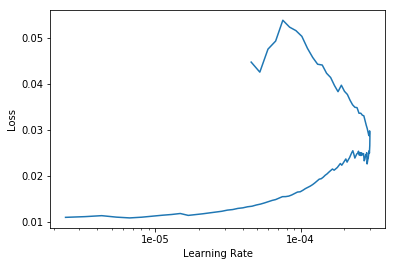

In [123]:
model.recorder.plot()

In [85]:
interp = ClassificationInterpretation.from_learner(model)

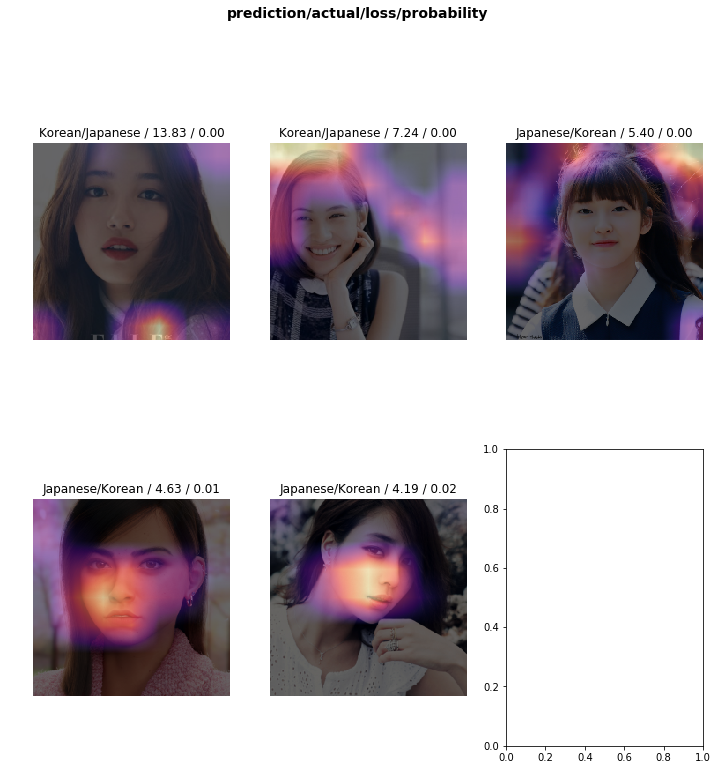

In [86]:
interp.plot_top_losses(5)

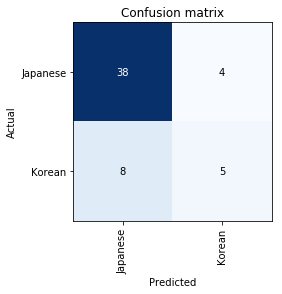

In [87]:
interp.plot_confusion_matrix()

In [88]:
model.save('Girls-latest')

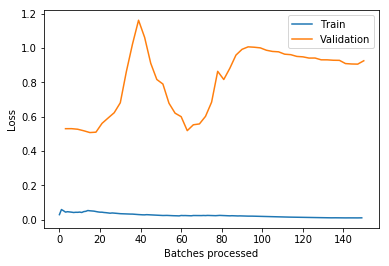

In [89]:
model.recorder.plot_losses()

In [90]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Korean

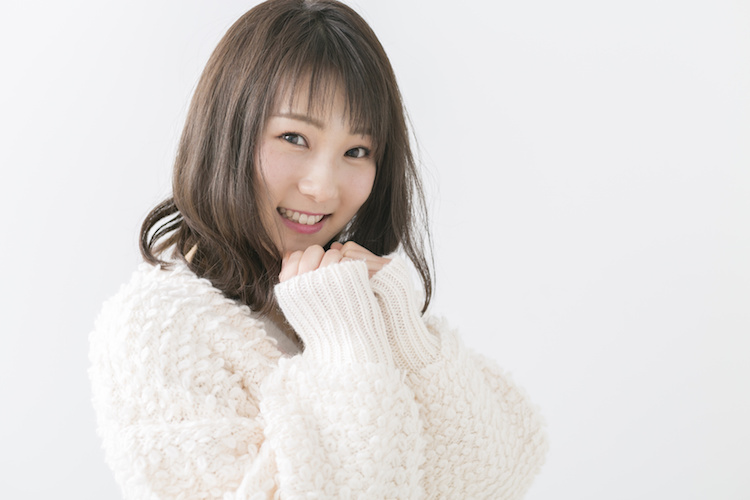

In [107]:
img = open_image(path/'Japanese'/'00000021.jpg')
img

In [109]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Japanese


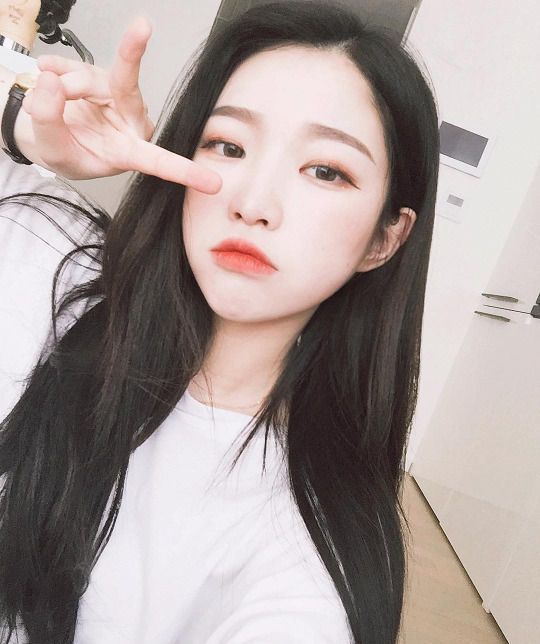

In [110]:
img = open_image(path/'Korean'/'00000021.jpg')
img

In [112]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Korean


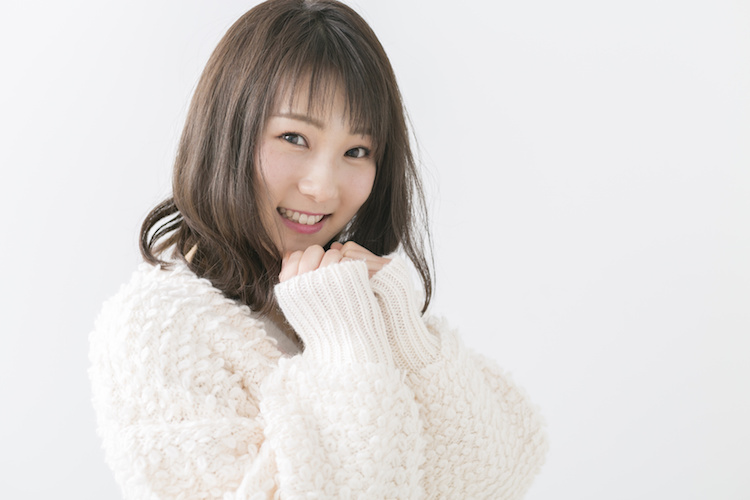

In [113]:
img = open_image(path/'Japanese'/'00000021.jpg')
img

In [114]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Japanese


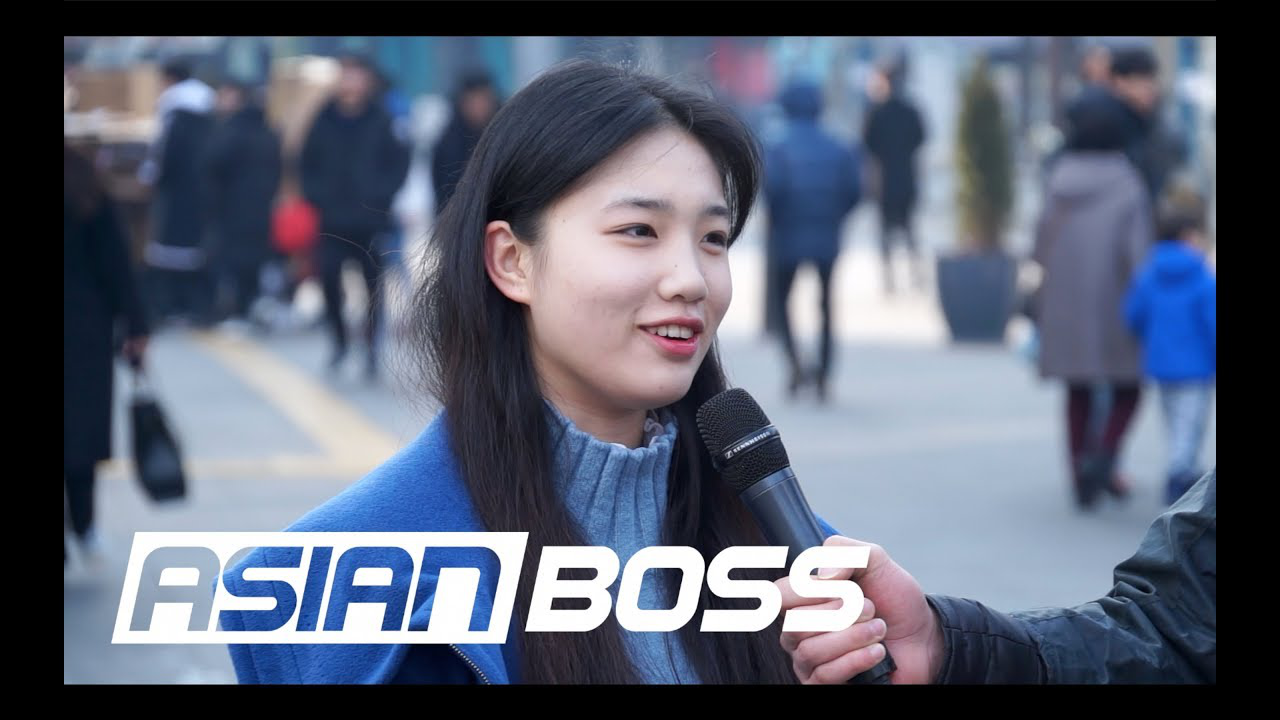

In [115]:
img = open_image(path/'Korean'/'00000031.jpg')
img

In [116]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Korean


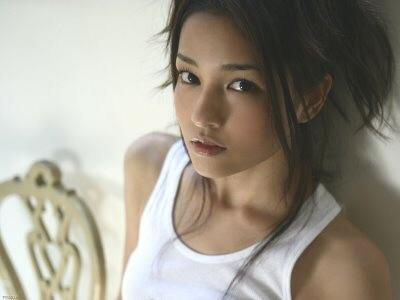

In [119]:
img = open_image(path/'Japanese'/'00000041.jpg')
img

In [120]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Japanese


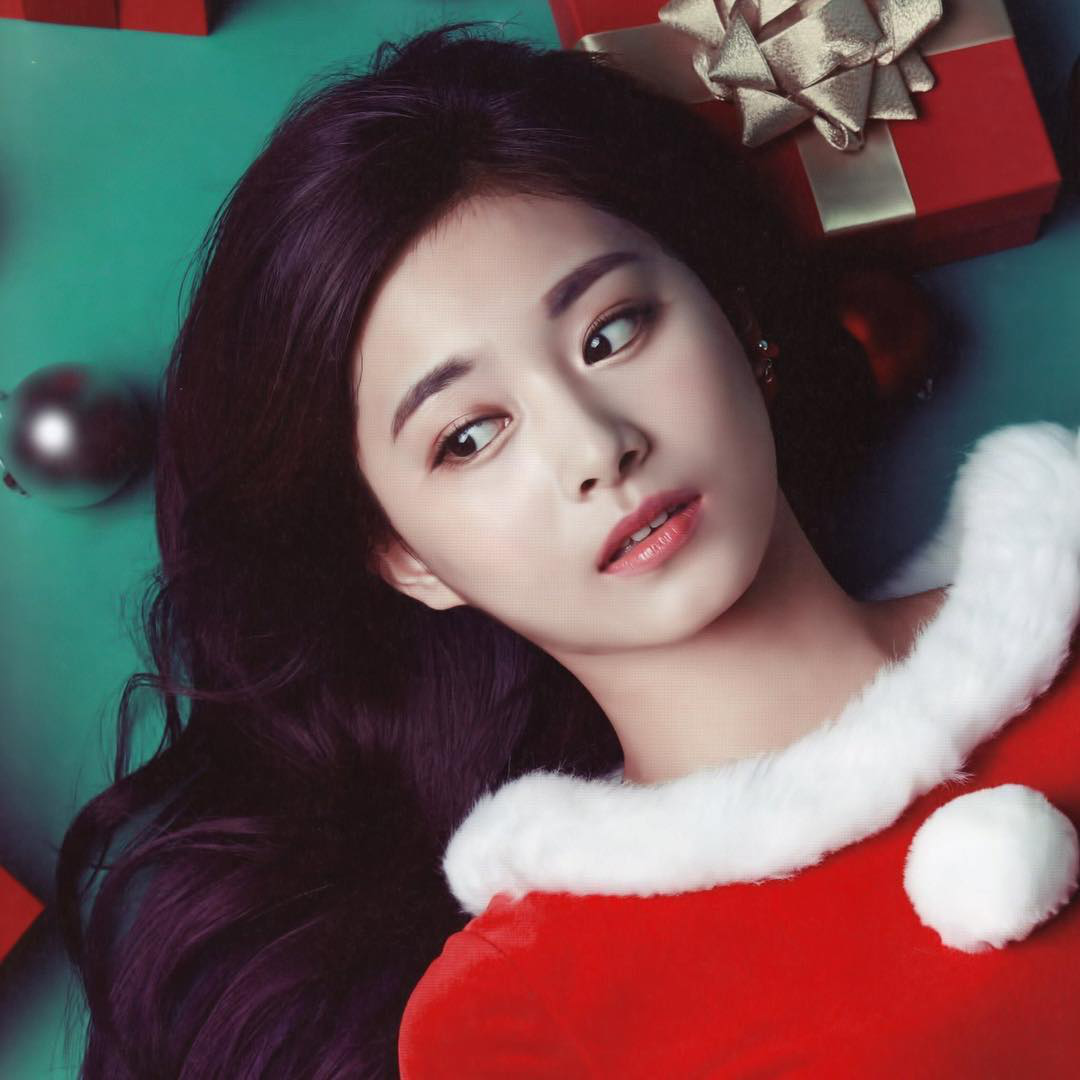

In [121]:
img = open_image(path/'Korean'/'00000041.jpg')
img

In [122]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The girl is : ',pred_class)

The girl is :  Korean
